## 개념 정리
### 용어 정리
- LSTM
  - 타임스텝이 긴 데이터를 효과적으로 학습하기 위한 순환층
  - 입력 게이트(새로운 정보를 셀에 저장), 삭제 게이트(셀 상태에 있는 정보 제거), 출력 게이트(다음 상태로 출력) 역할을 하는 작은 셀들이 포함됨
  - 은닉 상태외에 셀 상태를 출력함. 이는 현재 위치한 층에서만 순환됨
  - 입력을 은닉상태와 곱한뒤, 시그모이드 함수나 tanh 함수를 통과시킴. 이 두 결과를 곱한 후, 이전 셀 상태와 더함.
- GRU
  - LSTM에 비해, 가중치를 곱하는 셀이 하나가 없으면서, 성능은 비슷함.
### 핵심 패키지와 함수 (Tensorflow)
- LSTM
  - 첫번째 매개변수에 뉴런의 갯수를 지정
  - dropout: 입력에 대한 드롭아웃 비율을 지정
  - return_sequences: 모든 타임스텝의 은닉 상태를 출력할지 결정. 기본값은 False.
- GRU
  - 첫번째 매개변수에 뉴런의 갯수를 지정
  - dropout: 입력에 대한 드롭아웃 비율을 지정
  - return_sequences: 모든 타임스텝의 은닉 상태를 출력할지 결정. 기본값은 False.


In [1]:
'''데이터 준비하기'''
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
# 데이터 불러오기
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
# 검증셋 나누기
train_input, val_input, train_target, val_target  = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
# 패딩을 통해 길이를 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen=100)

AttributeError: module 'keras.engine.base_layer' has no attribute 'BaseRandomLayer'

Epoch 1/100
313/313 [==============================] - 19s 51ms/step - loss: 0.6928 - accuracy: 0.5279 - val_loss: 0.6922 - val_accuracy: 0.5678
Epoch 2/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6910 - accuracy: 0.6022 - val_loss: 0.6899 - val_accuracy: 0.6278
Epoch 3/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6872 - accuracy: 0.6464 - val_loss: 0.6844 - val_accuracy: 0.6424
Epoch 4/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6779 - accuracy: 0.6640 - val_loss: 0.6696 - val_accuracy: 0.6646
Epoch 5/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6450 - accuracy: 0.6963 - val_loss: 0.6088 - val_accuracy: 0.7214
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5817 - accuracy: 0.7326 - val_loss: 0.5692 - val_accuracy: 0.7314
Epoch 7/100
313/313 [==============================] - 16s 50ms/step - loss: 0.5553 - accuracy: 0.7447 - val_loss: 0.5488 - val_ac

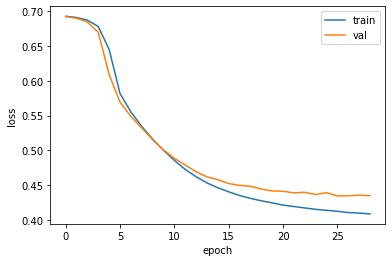

In [2]:
'''LSTM 셀을 사용한 순환신경망(RNN) 모델 만들기'''
from tensorflow import keras
# 모델 설계하기
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

# 모델 구성하기
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
# 콜백함수 정의하기
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# 모델 학습하기
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 학습결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

Epoch 1/100
313/313 [==============================] - 20s 54ms/step - loss: 0.6926 - accuracy: 0.5285 - val_loss: 0.6918 - val_accuracy: 0.5872
Epoch 2/100
313/313 [==============================] - 16s 53ms/step - loss: 0.6898 - accuracy: 0.6127 - val_loss: 0.6866 - val_accuracy: 0.6740
Epoch 3/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6636 - accuracy: 0.6840 - val_loss: 0.6275 - val_accuracy: 0.6934
Epoch 4/100
313/313 [==============================] - 16s 53ms/step - loss: 0.6122 - accuracy: 0.6988 - val_loss: 0.6019 - val_accuracy: 0.7058
Epoch 5/100
313/313 [==============================] - 16s 50ms/step - loss: 0.5926 - accuracy: 0.7165 - val_loss: 0.5859 - val_accuracy: 0.7258
Epoch 6/100
313/313 [==============================] - 16s 53ms/step - loss: 0.5761 - accuracy: 0.7279 - val_loss: 0.5686 - val_accuracy: 0.7360
Epoch 7/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5605 - accuracy: 0.7405 - val_loss: 0.5536 - val_ac

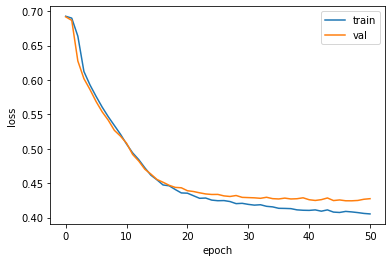

In [3]:
'''순환층에 Dropout 적용하기'''
# 모델 설계하기
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

# 모델 구성하기
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
# 콜백함수 정의하기
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# 모델 학습하기
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 학습결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

Epoch 1/100
313/313 [==============================] - 36s 100ms/step - loss: 0.6930 - accuracy: 0.5160 - val_loss: 0.6924 - val_accuracy: 0.5462
Epoch 2/100
313/313 [==============================] - 30s 94ms/step - loss: 0.6907 - accuracy: 0.5864 - val_loss: 0.6883 - val_accuracy: 0.6420
Epoch 3/100
313/313 [==============================] - 29s 93ms/step - loss: 0.6797 - accuracy: 0.6530 - val_loss: 0.6626 - val_accuracy: 0.6898
Epoch 4/100
313/313 [==============================] - 29s 92ms/step - loss: 0.6129 - accuracy: 0.7000 - val_loss: 0.5553 - val_accuracy: 0.7280
Epoch 5/100
313/313 [==============================] - 29s 94ms/step - loss: 0.5420 - accuracy: 0.7347 - val_loss: 0.5210 - val_accuracy: 0.7514
Epoch 6/100
313/313 [==============================] - 29s 93ms/step - loss: 0.5164 - accuracy: 0.7545 - val_loss: 0.5021 - val_accuracy: 0.7630
Epoch 7/100
313/313 [==============================] - 30s 97ms/step - loss: 0.5002 - accuracy: 0.7628 - val_loss: 0.4886 - val_a

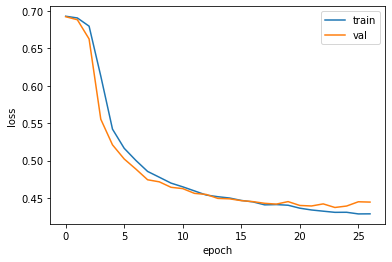

In [4]:
'''2개의 순환층을 연결하기'''
# 모델 설계하기
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

# 모델 구성하기
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
# 콜백함수 정의하기
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# 모델 학습하기
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 학습결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6924 - accuracy: 0.5242 - val_loss: 0.6914 - val_accuracy: 0.5504
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6901 - accuracy: 0.5763 - val_loss: 0.6888 - val_accuracy: 0.5922
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6864 - accuracy: 0.6055 - val_loss: 0.6845 - val_accuracy: 0.6124
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6804 - accuracy: 0.6203 - val_loss: 0.6775 - val_accuracy: 0.6234
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6710 - accuracy: 0.6350 - val_loss: 0.6670 - val_accuracy: 0.6346
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6565 - accuracy: 0.6514 - val_loss: 0.6509 - val_accuracy: 0.6498
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6327 - accuracy: 0.6722 - val_loss: 0.6221 - val_ac

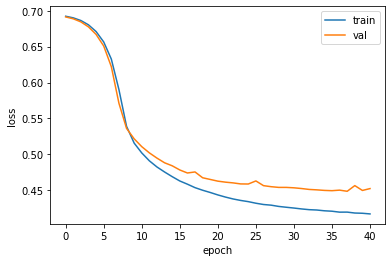

In [5]:
'''GRU 신경망 훈련하기'''
# 모델 설계하기
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

# 모델 구성하기
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
# 콜백함수 정의하기
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# 모델 학습하기
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 학습결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [6]:
'''2개의 순환층을 쌓은 모델을 평가하기'''
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 11s 14ms/step - loss: 0.4333 - accuracy: 0.7966


[0.4332805871963501, 0.7965599894523621]